Using the PyTorch ANN framework, please implement a simple autoencoder for the Fashion MNIST dataset. For the loss function, use the Mean Squared Error (MSE) between the input image and the reconstructed image. An example tutorial with explanations can be found here (https://www.geeksforgeeks.org/implementing-an-autoencoder-in-pytorch/)

In [11]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt


In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()

# Download the Dataset
dataset = datasets.FashionMNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)

# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = 32,
                                     shuffle = True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.3MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 232kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 4.24MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 18.9MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [13]:
class AE(torch.nn.Module):
    def __init__(self):
        super(AE, self).__init__()

        # Encoder
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
        )

        # Decoder
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [14]:
# Model Initialization
model = AE().to(device)

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
							lr = 1e-2,
							weight_decay = 1e-8)


Epoch [1/10], Loss: 0.0264
Epoch [2/10], Loss: 0.0261
Epoch [3/10], Loss: 0.0226
Epoch [4/10], Loss: 0.0219
Epoch [5/10], Loss: 0.0297
Epoch [6/10], Loss: 0.0230
Epoch [7/10], Loss: 0.0223
Epoch [8/10], Loss: 0.0248
Epoch [9/10], Loss: 0.0221
Epoch [10/10], Loss: 0.0232


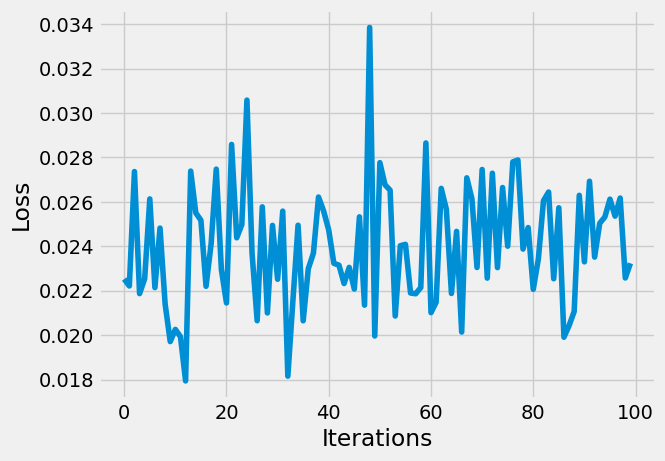

In [15]:
epochs = 10
outputs = []
losses = []
for epoch in range(epochs):
  for (image, _) in loader:

      # Flatten the image and move to device
      image = image.view(-1, 28 * 28).to(device)

      # Output of Autoencoder
      reconstructed = model(image)

      # Calculating the loss function
      loss = loss_function(reconstructed, image)

      # The gradients are set to zero,
      # the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Storing the losses in a list for plotting
      losses.append(loss.item())

  print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
  outputs.append((epoch, image, reconstructed))

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses[-100:])


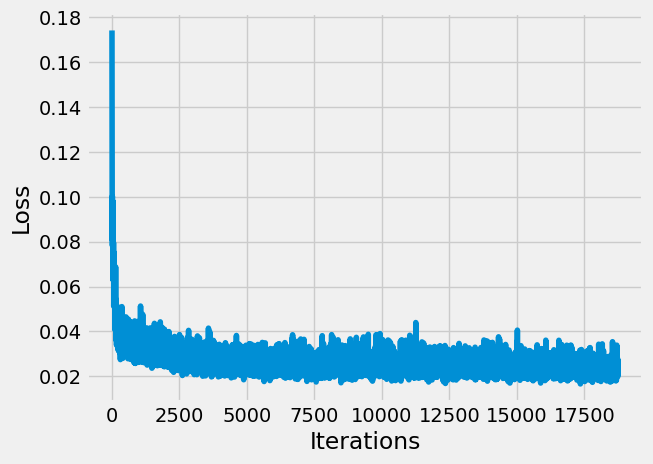

In [16]:
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.plot(losses)

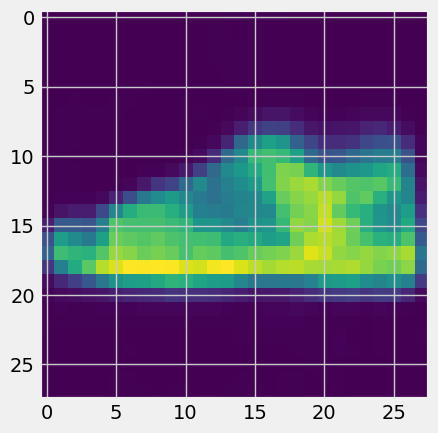

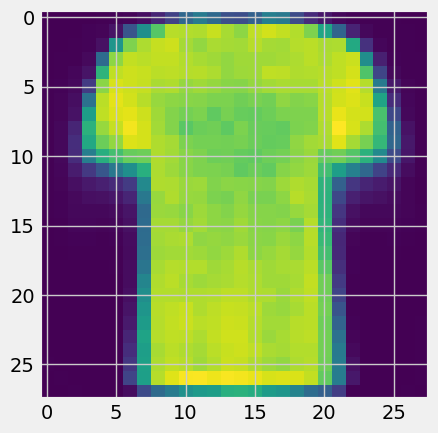

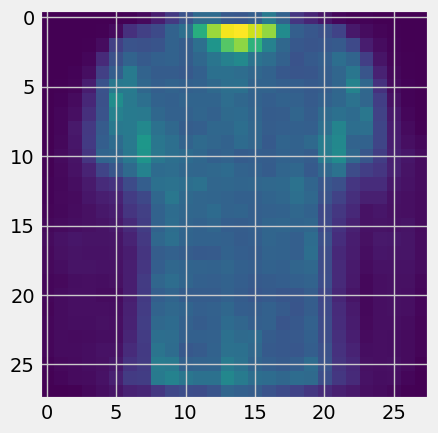

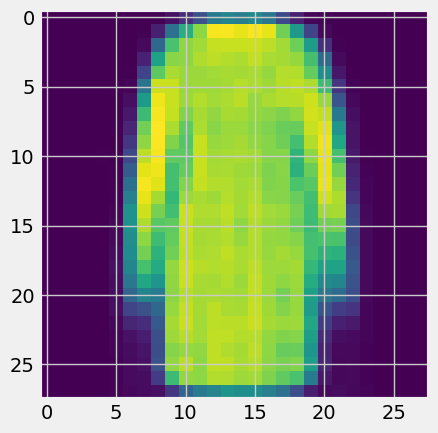

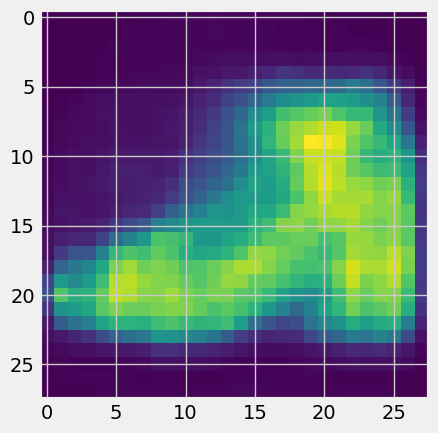

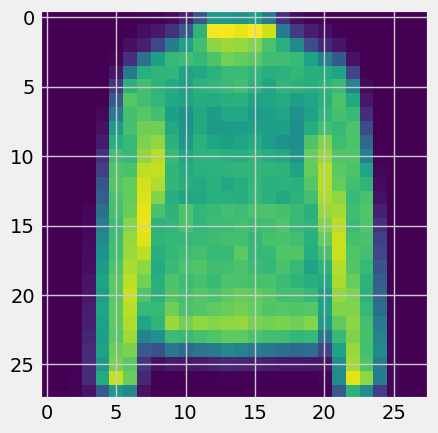

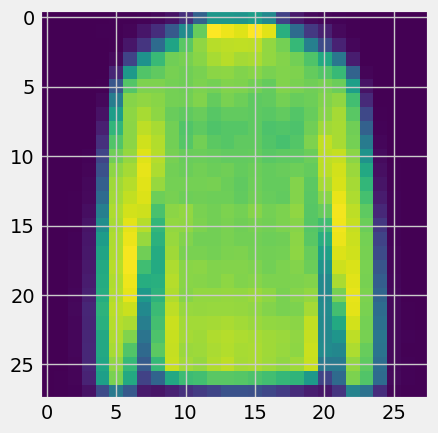

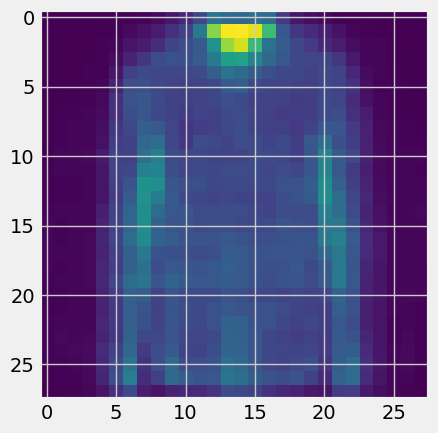

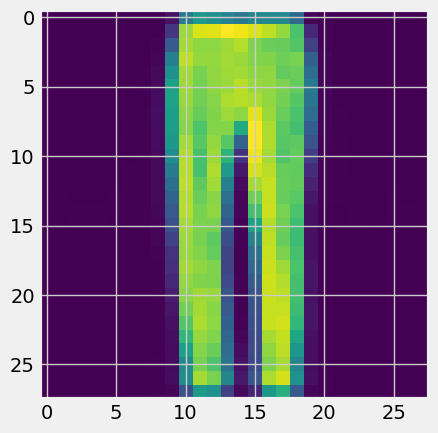

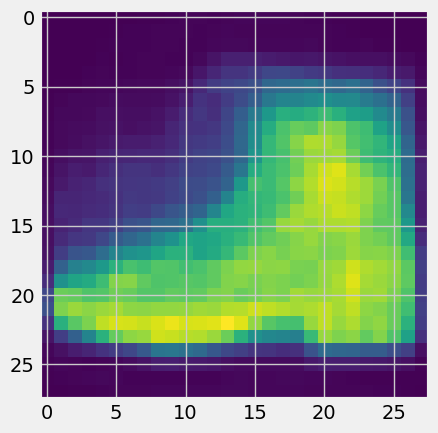

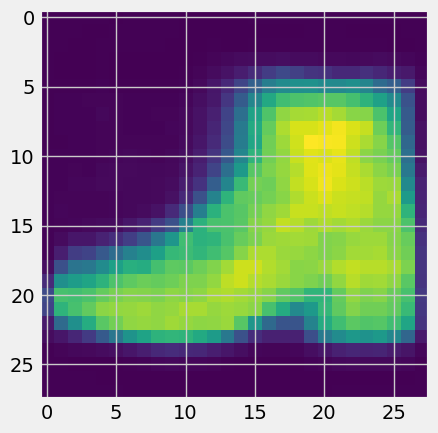

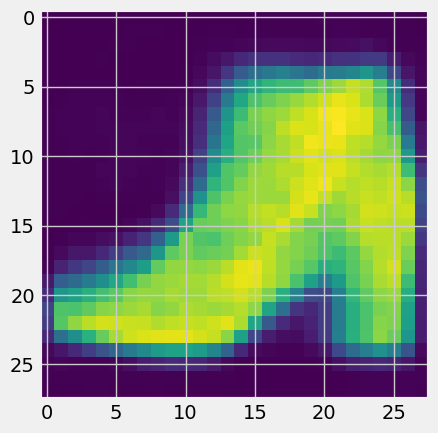

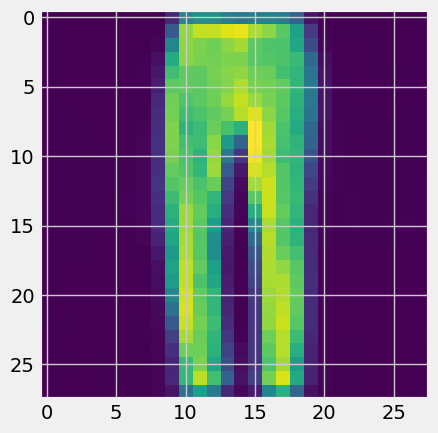

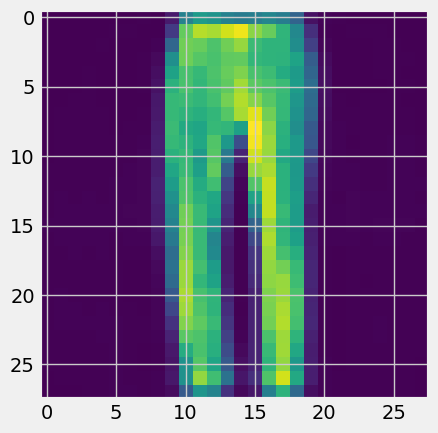

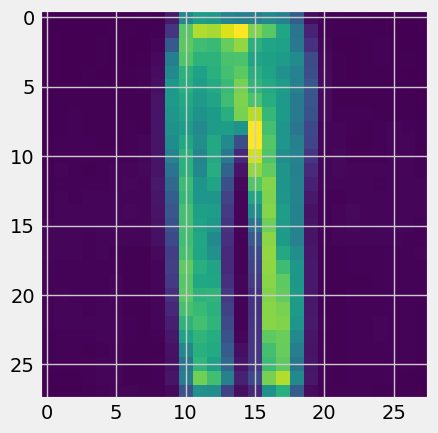

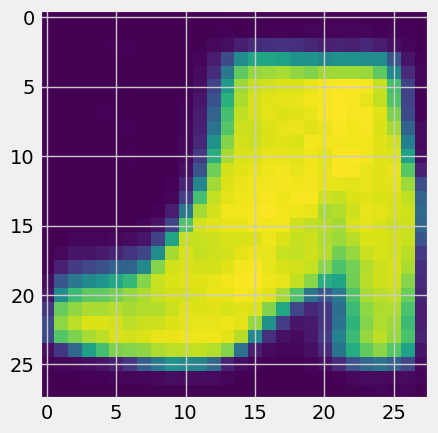

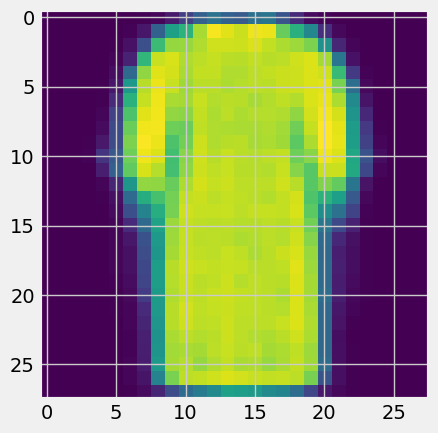

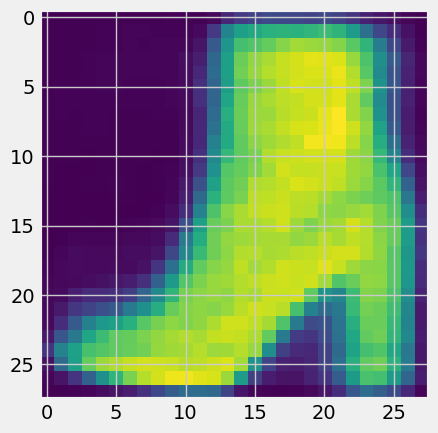

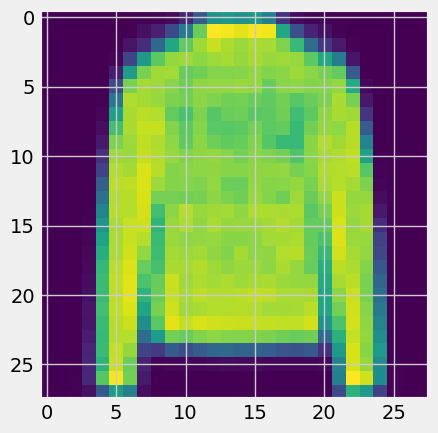

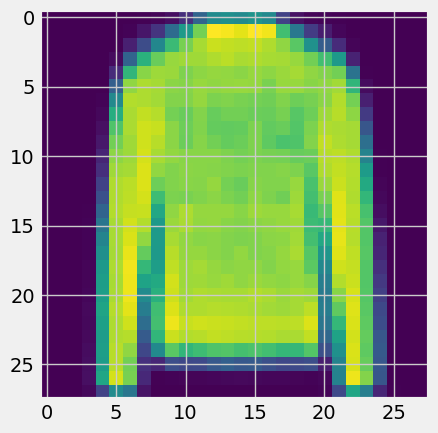

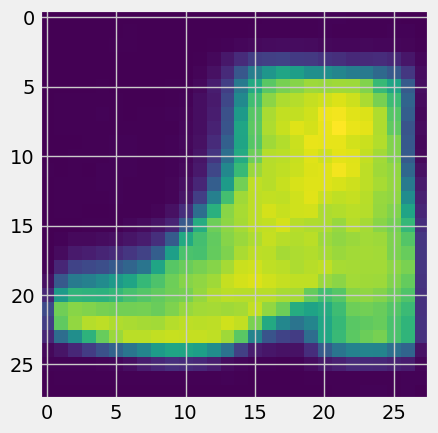

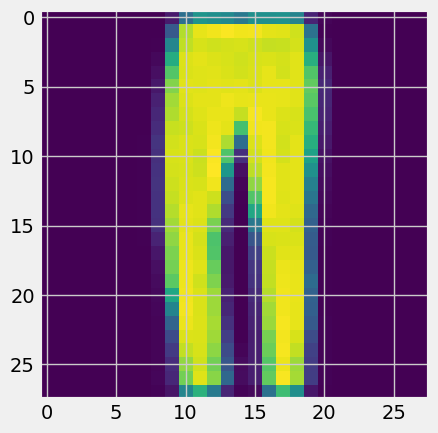

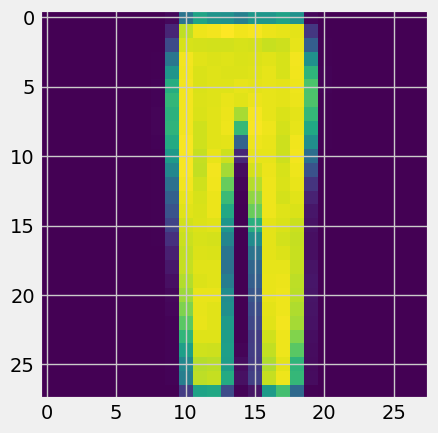

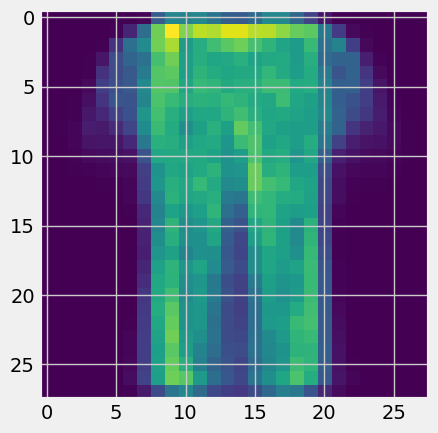

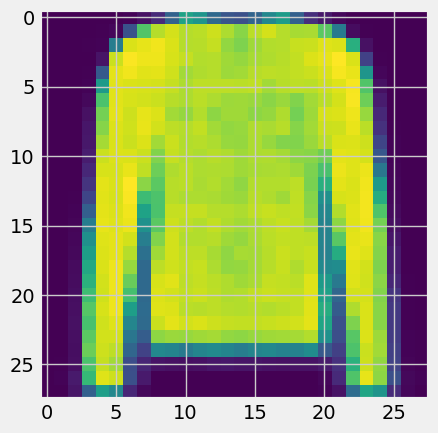

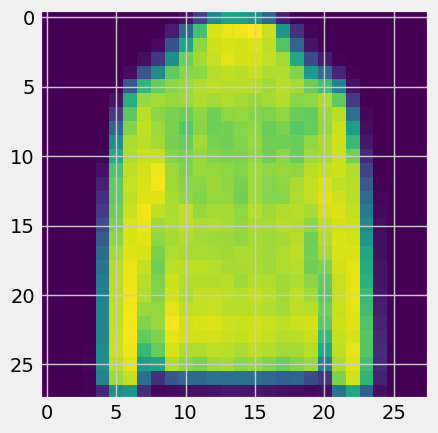

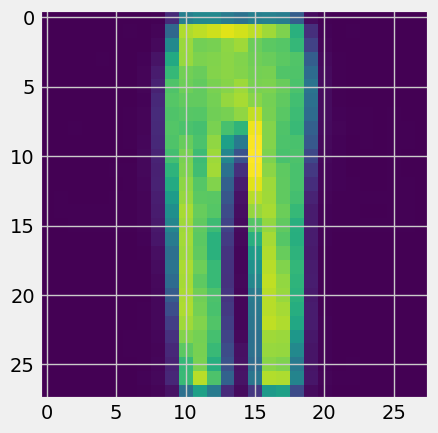

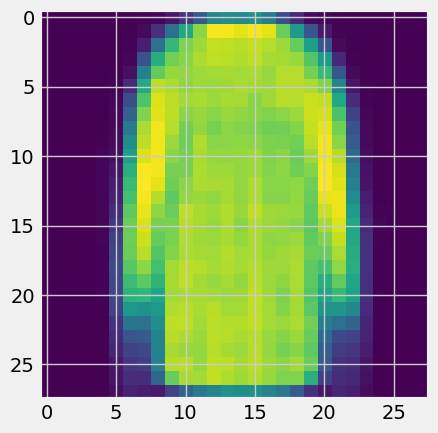

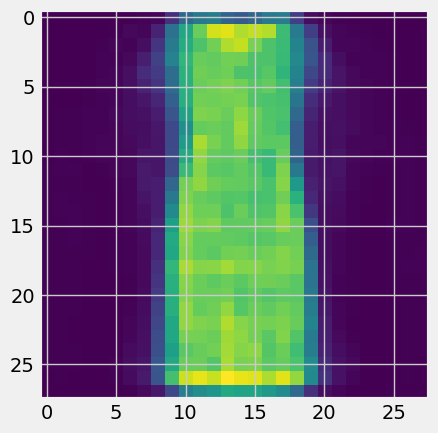

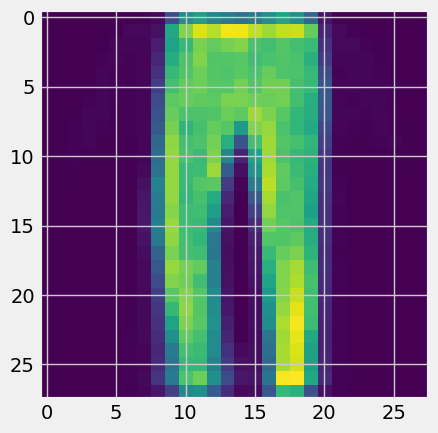

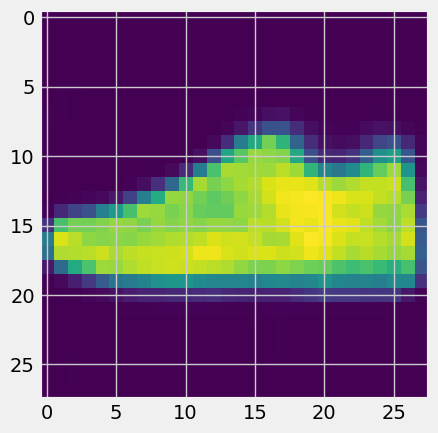

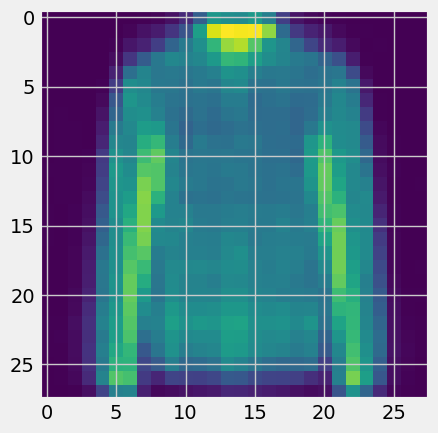

In [17]:
for i, item in enumerate(reconstructed):
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0].detach().numpy())
  plt.show()

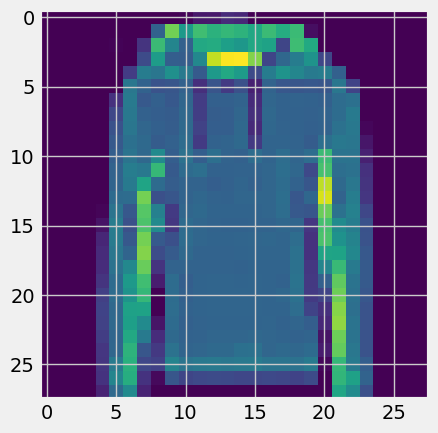

In [18]:
for i, item in enumerate(image):
# Reshape the array for plotting
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0])

